# News Mood

In [28]:
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
consumer_key = "QKgn6njuGSOLWK1hgBLFvRSmT"
consumer_secret = "W81c1NrGsF2ZS3EKjqLBFW9pEswdoxjA3Xb6JzV4YK7ytmDln9"
access_token = "115752339-YSjcEfJr2FketAuVWuNJEmNV6XNxanP8KuVA9clZ"
access_token_secret = "SmkUm9quhjuIxEu3NP7cY8YhEqpPEblx6Dj2kzw7nEwkl"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

# Target Search Term
target_terms = ["@BBC", "@CBS", "@CNN", "@Fox", "@nytimes"]

# Array to hold sentiment
sentiment_array = []
counter = 1


In [29]:
# Loop through each Term
for terms in target_terms:
    public_tweets = api.user_timeline(terms, count=100)
    tweetnumber = 1       
    for tweet in public_tweets:
        print("Tweet %s: %s" % (counter, tweet["text"]))
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = tweetnumber
        sentiment_array.append({"Media Source": terms,
                           "Text":tweet["text"],
                           "Date": tweet["created_at"],
                           "Compound": compound,
                           "Positive": pos,
                           "Neutral": neu,
                           "Negative": neg,
                           "Tweet Count": tweetnumber})
        tweetnumber +=1
        counter +=1


Tweet 1: When mother Marie mysteriously leaves the family home, the repercussions are enormous.

#ComeHome | 9pm | @BBCOne |… https://t.co/S4JgnzQlAx
Tweet 2: 🇩🇪😂 Even if you don't speak German, this is worth watching until the end! 
#LiveAtTheApollo https://t.co/J3l8oToRbk
Tweet 3: 🍜 We've got oodles of noodles with recipes for pad Thai, chow mein, ramen, pho and stir-fries.
👉… https://t.co/JWfrcIhn2X
Tweet 4: 😬 What does Facebook know about you? https://t.co/lG4ffeCG09
Tweet 5: RT @BBCTwo: Happy #WorldTheatreDay! *leaves this here and runs away* @SaraPascoe 🎭😂 https://t.co/3XlEb5gr15
Tweet 6: RT @BBCScotland: Meet the master of the radiator harp

@DaftLimmy returns to BBC Scotland on Thursday 5 April. https://t.co/G7mjFEJx6k
Tweet 7: RT @bbcthree: 12-year-old Keilan has very severe curvature of the spine. He needs surgery ASAP but the 5 hour operation could leave him par…
Tweet 8: RT @bbccomedy: Cathy, master of shade. #Mum https://t.co/VjC2ttkaNF
Tweet 9: RT @BBCR1: (•_•)
&lt;)   )╯

Tweet 101: Count on Entertainer Of The Year nominee @LukeBryanOnline to crash the party with an epic performance at the 53rd… https://t.co/27ua60HTqu
Tweet 102: Join @eltonofficial and some of today's hottest names in music when they take the stage to perform his most memorab… https://t.co/jz0jaShZIj
Tweet 103: RT @ACMawards: The ACM for New Vocal Group of the Year goes to @MidlandOfficial! And yes, that really was @Reba on the phone! #ACMawards ht…
Tweet 104: RT @ACMawards: In case you didn’t know, the ACM for New Male Vocalist of the Year goes to @BrettYoungMusic. Check out his reaction when @Re…
Tweet 105: RT @ACMawards: Over the weekend @Reba called the ACM New Artist of the Year winners to let them know they had won! Let’s just say our New F…
Tweet 106: Congratulations to the 53rd #ACMawards New Artist winners @Lauren_Alaina, @MidlandOfficial, and @BrettYoungMusic! W… https://t.co/Fr8H4arwGj
Tweet 107: New start times in East/Central Time Zones #60Minutes 7:35ET/6:35CT #Instinct  

Tweet 201: England's health agency is warning parents to be aware of the signs and symptoms of scarlet fever as infections con… https://t.co/vKJ6QOKqmv
Tweet 202: Blue states are far more likely to lose money and power over Census citizenship question | Analysis by CNN's Harry… https://t.co/13EWDxnd6X
Tweet 203: An Ohio fertility clinic says more than 4,000 eggs and embryos were affected by a freezer malfunction, double the n… https://t.co/0EZ5F2Ua6p
Tweet 204: Wall Street bonuses soar 17% to an average of $184,200 https://t.co/qlOQGfehL8 https://t.co/1bw7FWYwwl
Tweet 205: Waymo and Jaguar unveil a self-driving, electric SUV https://t.co/DTylJKCuML https://t.co/2aD3JXwfGM
Tweet 206: 11 reasons (besides the NCAA Final Four) to visit San Antonio https://t.co/1YGqpmrZKz via @CNNTravel https://t.co/Vi45YehYXR
Tweet 207: Former Disney Channel star Caroline Sunshine is joining the White House press team https://t.co/rOYDj2tPs1 https://t.co/xamwbkWP7h
Tweet 208: Walmart says it will stop sell

Tweet 301: I’ve been watching Big Little Lies lately, and the portrayal of the complexity of abusive relationships is both exc… https://t.co/qMNxveax5O
Tweet 302: @RedRoxProjects Thank you! 💐
Tweet 303: @OphelieLechat 💓
Tweet 304: This, a thousand times for job interviews or ”I just want to catch up and talk about things”. https://t.co/5AA2d4vkwd
Tweet 305: @SaskiaFairfull North Melbourne Meat Market.
Tweet 306: @SaskiaFairfull Thank you!
Tweet 307: This incredible venue plus my art direction skills. I’m pretty proud of myself.

💖 https://t.co/st8XZOoc4y
Tweet 308: Have you ever seen a conference releasing a diversity report, even if it’s only in the spectrum of gender?

I haven… https://t.co/e819on1BUh
Tweet 309: @darngooood I’m perpetually inspired by your clothing style. ✨😭😍
Tweet 310: @mspowahs ugh damn Facebook, the root of evil
Tweet 311: Company: Diversity and inclusion are really important to us!

Company has:

→ Zero women
→ Women only in support, m… https://t.co/MZmNK67D6a
Tw

Tweet 401: RT @NYTStyles: "How can I get over my sense of betrayal, my rage and my desire to punish this man for the disrespectful way he treated me?"…
Tweet 402: Detectives in Los Angeles searching for an actress who disappeared last month found a body they believe is hers, th… https://t.co/UctTxeFEo6
Tweet 403: "We have created a double tragedy for these people." Chronic pain patients treated with high doses of opioids are c… https://t.co/O2ZPgi7gM5
Tweet 404: RT @nytopinion: John Paul Stevens: Rarely in my lifetime have I seen the type of civic engagement school children demonstrated throughout t…
Tweet 405: Before harvesting millions of users' Facebook data, Cambridge Analytica had help from an employee at Peter Thiel's… https://t.co/yq5T0MfyyH
Tweet 406: Investors pummeled tech stocks again on Tuesday as they hurried to drop shares in the very sector that once drove a… https://t.co/55Ge3ZrTLI
Tweet 407: RT @PamelaPaulNYT: Everyone except Sean Penn will enjoy reading this book revi

In [34]:
sentiments_df = pd.DataFrame.from_dict(sentiment_array)
sentiments_df['Media Source'] = sentiments_df['Media Source'].map(lambda x: x.lstrip('@'))

In [35]:
# Data Frame for holding sentiments
sentiments_csv = sentiments_df[['Media Source','Date','Text','Compound','Positive','Neutral','Negative','Tweet Count']]
sentiments_csv.head() 

,Media Source,Date,Text,Compound,Positive,Neutral,Negative,Tweet Count
0,BBC,Tue Mar 27 18:30:07 +0000 2018,When mother Marie mysteriously leaves the fami...,0.0000,0.000,1.000,0.0,1
1,BBC,Tue Mar 27 18:00:08 +0000 2018,"🇩🇪😂 Even if you don't speak German, this is wo...",0.2942,0.128,0.872,0.0,2
2,BBC,Tue Mar 27 17:00:07 +0000 2018,🍜 We've got oodles of noodles with recipes for...,0.0000,0.000,1.000,0.0,3
3,BBC,Tue Mar 27 16:00:15 +0000 2018,😬 What does Facebook know about you? https://t...,0.0000,0.000,1.000,0.0,4
4,BBC,Tue Mar 27 15:40:40 +0000 2018,RT @BBCTwo: Happy #WorldTheatreDay! *leaves th...,0.6114,0.250,0.750,0.0,5


In [36]:
sentiments_csv.to_csv("500 News Mood Tweets.csv")

In [37]:
# Setting colors for each organization 
colors = {"BBC": "lightblue", "CBS":"green", "CNN":"red", "Fox":"blue", "nytimes": "yellow"}

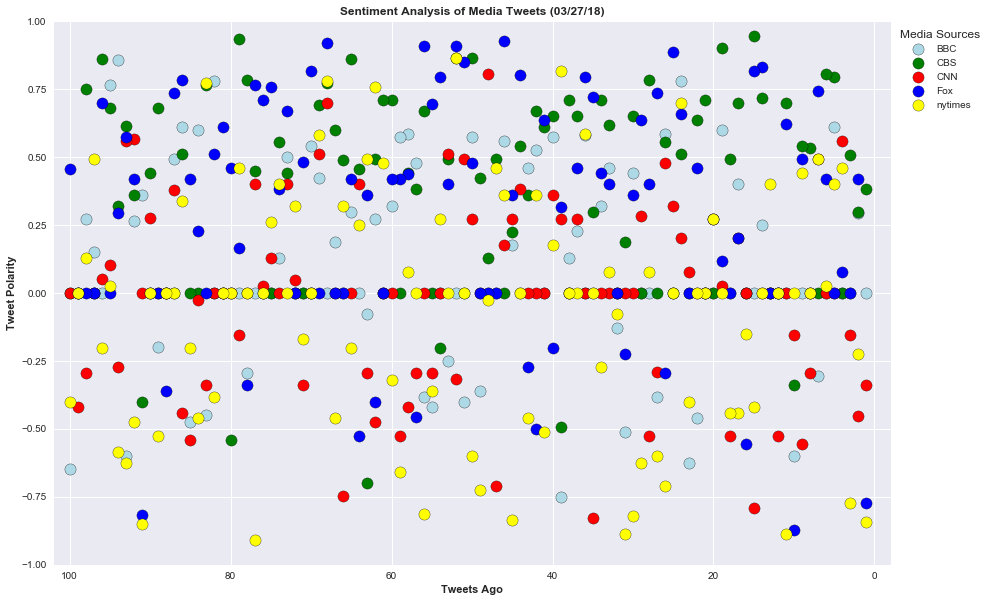

In [38]:
# Build the scatter plots for each media source 
plt.figure(figsize = (15,10))

for targets in colors.keys():
    Plot_DF = sentiments_df[sentiments_df['Media Source'] == targets] 
    plt.scatter(Plot_DF["Tweet Count"],
                Plot_DF["Compound"], 
                label = targets, color = colors[targets],
                edgecolor = "black", s=125)
    
plt.legend(bbox_to_anchor = (1,1), title = 'Media Sources')    

# Incorporate the other graph properties
plt.xlabel("Tweets Ago",fontweight='bold')
plt.ylabel("Tweet Polarity",fontweight='bold')
plt.title("Sentiment Analysis of Media Tweets (%s)" % (time.strftime("%x")),fontweight='bold')
plt.xlim(102,-2, -1)
plt.ylim(-1,1)
plt.grid(True)
sns.set()

# Save the figure
plt.savefig("SentimentAnalysis.png")

# Show plot
plt.show()

In [82]:
#Mean scores by organization
scoresbyorganization = sentiments_csv.groupby("Media Source")["Compound"].mean()
scoresbyorganization 


Media Source
BBC        0.096663
CBS        0.353884
CNN       -0.010772
Fox        0.273663
nytimes   -0.061596
Name: Compound, dtype: float64

In [83]:
x_axis = np.arange(len(scoresbyorganization))

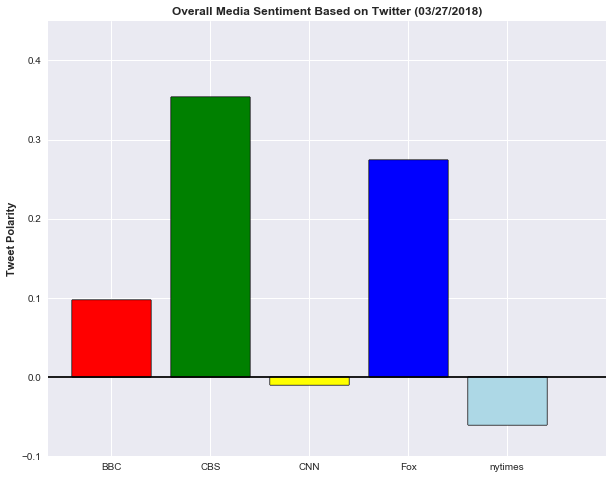

In [84]:
# Build the bar chart for each media source 
plt.figure(figsize = (10,8))

for targets in colors.keys():
    Plot_DF = sentiments_df[sentiments_df['Media Source'] == targets] 
    plt.bar(x_axis, scoresbyorganization, color = {"lightblue","green", "yellow", "red", "blue"}, label = targets, edgecolor = "black")
    
plt.ylim(-.1, .45)
plt.ylabel("Tweet Polarity",fontweight='bold')
plt.axhline(y=0, color = 'black')
plt.title("Overall Media Sentiment Based on Twitter (%s)" % (time.strftime("%m/%d/%Y")),fontweight='bold')
x_labels = ["BBC", "CBS", "CNN", "Fox", "nytimes"]
x_locations = [value for value in np.arange(6)] 
plt.xticks(x_locations, x_labels)
sns.set()

# Save the figure
plt.savefig('Overall Media Sentiment Based on Twitter.png')

# Show plot
plt.show()